<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
تحلیل زمانی
</font>
</h1>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime , date

housing_extended = pd.read_csv('housing_extended.csv', encoding='gbk')

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
می‌خواهیم گزارشی تهیه کنیم و مناطق مختلف شهر را از زوایای گوناگون مورد بررسی قرار دهیم. 
</font>
</p>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
قسمت اول
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
دیتافریمی به نام <code>districts_df</code> بسازید و <code>index</code> آنرا برابر ستون <code>district</code> قرار دهید. برای هر منطقه موارد زیر را حساب کنید:
<ul dir=rtl>

  <li>
pricePerSquare mean
<br>
متوسط قیمت هر متر مربع
</li>
<br>

  <li>
% houses with elevator
<br>
درصد خانه‌هایی که آسانسور دارند
</li>
<br>

  <li>
% houses with subway
<br>
درصد خانه‌هایی که به مترو دسترسی دارند
</li>
<br>

  <li>
square mean
<br>
متوسط متراژ خانه‌ها
</li>
<br>
  <li>
building age mean
<br>
متوسط عمر خانه‌ها (به سال)
<br>
(عمر هر خانه تا سال ۲۰۲۱ محاسبه می‌شود.)
</li>
<br>

  <li>
frequent buildingStructure
<br>
رایج‌ترین نوع ساختمان
</li>
<br>
</ul>
</font>
</p>

In [2]:
house_grouped = housing_extended.groupby('district')
district_house_count = house_grouped['elevator'].count()

pricePerSquare_mean = house_grouped.mean('pricePerSquare')
age = house_grouped.mean('pricePerSquare')

house_with_elevator = housing_extended[housing_extended.elevator.str.contains('has')]
house_elevator_grouped = house_with_elevator.groupby('district')['elevator'].count()

house_with_subway = housing_extended[housing_extended.subway.str.contains('has')]
house_subway_grouped = house_with_subway.groupby('district')['subway'].count()

mean_of_square_each_district = house_grouped['square'].mean()
mean_of_age_each_district = 2021 - house_grouped['constructionTime'].mean()

frequent_struct_each_district = house_grouped['buildingStructure']

In [3]:
freq_struct = ['steel-concrete composite','steel-concrete composite','steel-concrete composite',
              'mixed','steel-concrete composite','mixed','steel-concrete composite','steel-concrete composite',
              'steel-concrete composite','mixed','steel-concrete composite','mixed','mixed']

In [4]:
districts_df = pd.DataFrame({'district' : housing_extended.district.unique()})
districts_df.set_index('district', inplace=True)
districts_df.sort_index(inplace=True)

In [5]:
districts_df['pricePerSquare mean'] = pricePerSquare_mean['pricePerSquare'].values
districts_df['% houses with elevator'] = (house_elevator_grouped.values * 100) / district_house_count
districts_df['% houses with subway'] = (house_subway_grouped.values * 100) / district_house_count
districts_df['square mean'] = mean_of_square_each_district.values
districts_df['buildeng age mean'] = mean_of_age_each_district.values
districts_df['frequent buildingStructure'] = freq_struct

In [6]:
districts_df['pricePerSquare mean'] = districts_df['pricePerSquare mean'].apply(lambda x : round(x,2))
districts_df['% houses with subway'] = districts_df['% houses with subway'].apply(lambda x : round(x,4))
districts_df['square mean'] = districts_df['square mean'].apply(lambda x : round(x,4))
districts_df['buildeng age mean'] = districts_df['buildeng age mean'].apply(lambda x : round(x,4))

In [7]:
districts_df

,pricePerSquare mean,% houses with elevator,% houses with subway,square mean,buildeng age mean,frequent buildingStructure
district,,,,,,
1,5981.77,56.216550,93.4884,67.0479,25.1517,steel-concrete composite
2,3805.92,68.647623,61.8255,76.9514,20.6391,steel-concrete composite
3,3130.33,66.636691,47.0324,92.0715,15.4946,steel-concrete composite
4,2999.93,39.983398,43.0271,86.3223,18.3244,mixed
5,2841.76,80.077031,39.0056,89.2980,11.2714,steel-concrete composite
6,2952.22,37.892663,43.5537,100.1216,17.5365,mixed
7,4225.97,66.746216,68.3079,78.8455,22.5537,steel-concrete composite
8,5312.91,51.883462,61.0874,73.6152,24.1916,steel-concrete composite
9,3491.13,46.534461,27.6368,73.0475,25.6538,steel-concrete composite


<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
خط اول خروجی شما باید به شکل زیر باشد. (سطرها را بر اساس شماره منطقه مرتب کنید.)
</font>
</p>


|   district |   pricePerSquare mean |   % houses with elevator |   % houses with subway |   square mean |   buildeng age mean | frequent buildingStructure   |
|-----------:|----------------------:|-------------------------:|-----------------------:|--------------:|--------------------:|:-----------------------------|
|          1 |               5981.77 |                  56.216550 |                93.4884 |       67.0479 |             25.1517 | steel-concrete composite     |

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
تحلیل داده‌ها بر اساس ترتیب زمانی آنها در برخی حوزه‌ها کاربرد بسیاری دارد. برای مثال، پیش‌بینی قیمت در بورس، پیش‌بینی قیمت طلا، بررسی حجم فروش اجناس در بازه‌های زمانی مختلف و غیره. زمان انجام معاملات هر خانه در این دیتافریم مشخص شده است و ما می‌توانیم چنین تحلیل‌هایی را بر روی آن انجام دهیم.
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
اولین کاری که باید انجام دهیم، تبدیل ستون tradeTime به فرمت زمانی می‌باشد. برای این‌کار از تابع <code>to_datetime</code> استفاده می‌کنیم.
</font>
</p>

In [8]:
housing_extended['tradeTime'] = pd.to_datetime(housing_extended['tradeTime'])

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
قسمت دوم
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
طبق نظر افراد محلی، چند ماه است که قیمت خانه در حال کاهش است و پیش‌بینی می‌شود این روند ادامه یابد. در این تمرین می‌خواهیم صحت این نظریه را بررسی کنیم.
<ul dir=rtl>
  <li>متد <code>resample</code> متدی قدرتمند برای کار با سری‌های زمانی است. با این متد می‌توان سطرها را بر اساس بازه زمانی گروه‌بندی کرد. پارامتر <code>rule</code> بازه مورد نظر و پارامتر <code>on</code> ستونی که زمان در آن ذخیره شده را مشخص می‌کند.</li>
  <li>یک عکس شامل یک صفحه محور بسازید و اندازه طول و عرض آن را برابر ۸ اینچ قرار دهید.</li>
  <li>با استفاده از متد <code>resample</code> میانگین قیمت هر متر مربع در معاملات ماهانه را حساب کنید. قبل از سال ۲۰۱۰ زیر ده معامله انجام شده است. معاملات بعد از سال ۲۰۱۰ را وارد محاسبات خود کنید.
</li>
  <li>
با استفاده از رابط پانداس، اطلاعات به دست آمده را روی صفحه محوری که پیش از این ساختید رسم کنید. رنگ خط را برابر <code>crimson</code> قرار دهید.
</li>

<li>
تنظیمات را طوری تغییر دهید که نمودار خروجی شما دقیقا مانند شکل زیر شود.
</li>

</ul>
</font>
</p>


<p style="text-align:center;"><img src="fig1.png"></p>



In [9]:
date_resamble = housing_extended[housing_extended.tradeTime.dt.year >= 2010].resample(on='tradeTime',rule='1m')

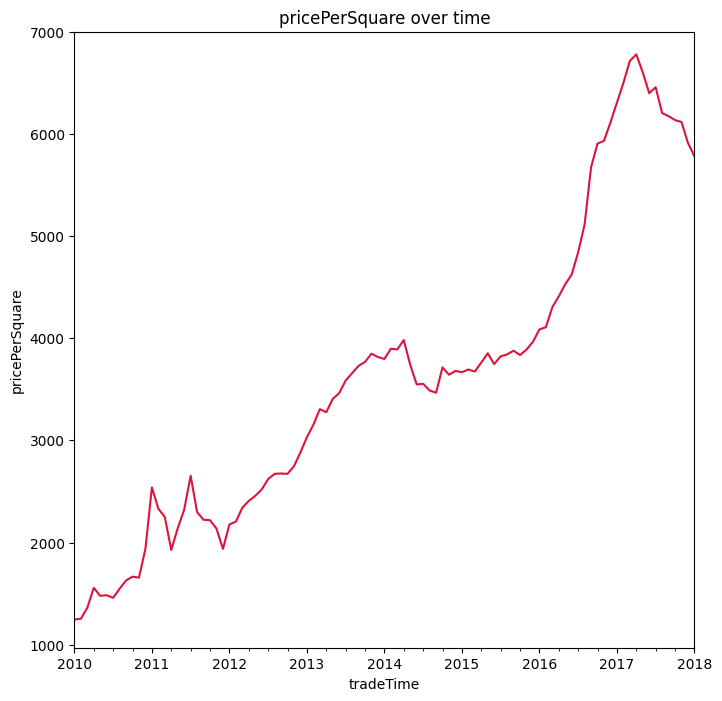

In [10]:
fig1 , ax1 = plt.subplots(figsize=(8,8))

date_resamble['pricePerSquare'].mean().plot(ax = ax1,color='crimson')

ax1.set_ylabel('pricePerSquare')
ax1.set_title('pricePerSquare over time')
ax1.set_ylim(ymax=7000)

fig1

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
قسمت سوم
</font>
</h2>
<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
شایعه دیگری که می‌خواهیم بررسی کنیم، کاهش <b> تعداد </b> معاملات خانه‌های نزدیک مرکز شهر است. این نمودار مانند نمودار قبلی است و این تغییرات را باید در آن ایجاد کنید.
<ul dir=rtl>

  <li>
بازه زمانی به جای ماه، ۳ ماه می‌باشد و علاوه بر اینکه فقط معاملات بعد از ۲۰۱۰ باید بررسی شوند، معاملات خانه‌هایی که فاصله آن‌ها از مرکز بیشتر یا مساوی ۱۵ کیلومتر است هم باید حذف شوند.
</li>
  <li>
رنگ خط را برابر <code>orange</code> قرار دهید.
</li>

<li>
تنظیمات را طوری تغییر دهید که نمودار خروجی شما دقیقا مانند شکل زیر شود.
</li>

<li>
نکته: ابتدا معاملات بعد از ۲۰۱۰ را انتخاب کنید، سپس از resample استفاده کنید و در نهایت تعداد خانه‌هایی که فاصله آنها کمتر از ۱۵ کیلومتر است را بشمارید.</li>

</ul>
</font>
</p>

<p style="text-align:center;"><img src="fig2.png"></p>



In [11]:
def freq(each):
    counter = 0
    
    for s in each.distanceToCapital:
        if s < 15:
            counter += 1
            
    return counter

In [12]:
sd = housing_extended[housing_extended.tradeTime.dt.year >= 2010].resample(rule='3m',on='tradeTime')

a = sd.apply(freq)

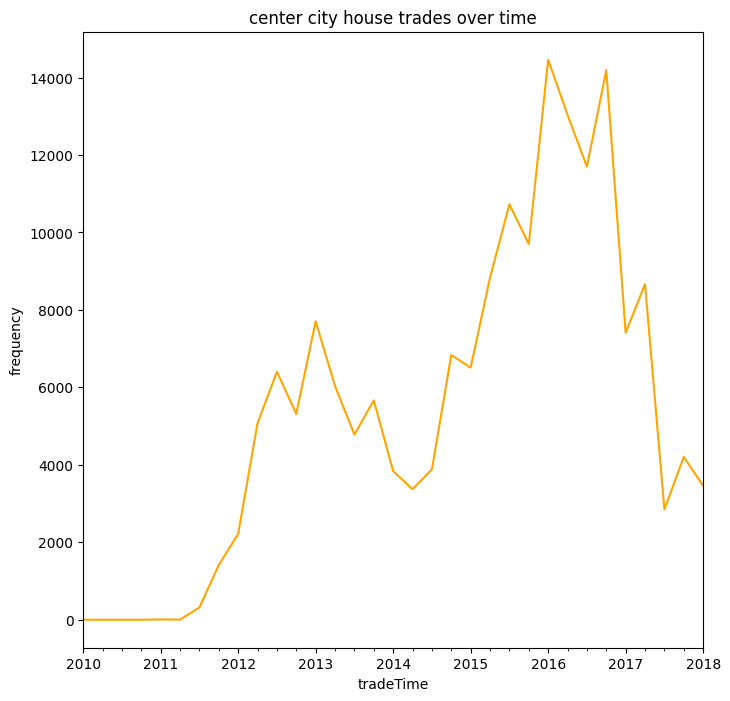

In [13]:
fig2 , ax2 = plt.subplots(figsize=(8,8))

a.plot(ax = ax2,color = 'orange')

ax2.set_ylabel('frequency')
ax2.set_title('center city house trades over time')


fig2

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<b>سلول جواب‌ساز</b>
</font>
</h2>


In [14]:

import zipfile
import joblib

joblib.dump(districts_df,"districts_df")
joblib.dump(fig1,"fig1")
joblib.dump(fig2,"fig2")

def compress(file_names):
    print("File Paths:")
    print(file_names)
    # Select the compression mode ZIP_DEFLATED for compression
    # or zipfile.ZIP_STORED to just store the file
    compression = zipfile.ZIP_DEFLATED
    # create the zip file first parameter path/name, second mode
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            # Add file to the zip file
            # first parameter file to zip, second filename in zip
            zf.write('./' + file_name, file_name, compress_type=compression)


file_names = ["districts_df","fig1","fig2", '5_time_series.ipynb']
compress(file_names)

File Paths:
['districts_df', 'fig1', 'fig2', '5_time_series.ipynb']
